In [1]:
import cv2
from matplotlib import cm, pyplot as plt

In [2]:
face_cascade = cv2.CascadeClassifier('D:\\TCC\\code\\src\\assets\\haarcascade_frontalface_default.xml')


def get_face(gray:cv2.Mat):
    """
    Aplica o classificador 'haarcascade_frontalface_default.xml' na imagem passada
    e retorna a face detectada com maior área total da imagem.

    ### Params
        gray : cv2.Mat
            Imagem openCV (cv2.Mat) de canal único

    ### Returns
        None | cv2.Mat
            A imagem recortada na região da face , se encontrada
    """
    max_area = 0
    x0 = y0 = w0 = h0 = 0
    
    for (x, y, w, h) in face_cascade.detectMultiScale(gray, 1.25, 4):
        area = w * h
        if area > max_area:
            max_area = area
            (x0, y0, w0, h0) = (x, y, w, h)
            
    if max_area == 0:
        return None
    # cv2.rectangle(gray, (x0, y0), (x0+w0, y0+h0), (0, 0, 255), 2)
    return gray[y0:y0 + h0, x0:x0 + w0]

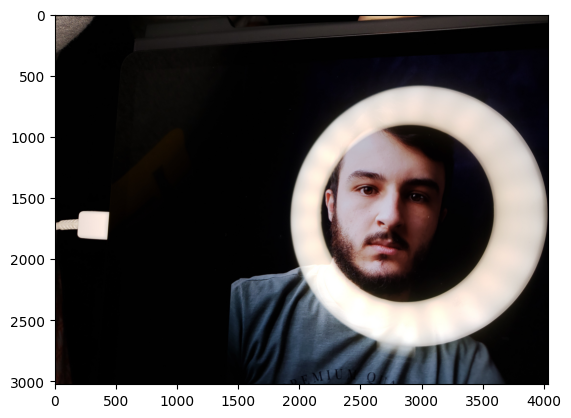

In [3]:
img = cv2.imread('../data/in/s_0001.jpg')
plt.imshow(img[...,::-1])

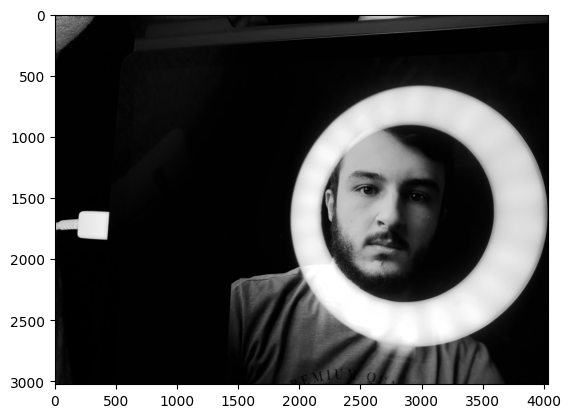

In [4]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray, cmap=cm.gray)

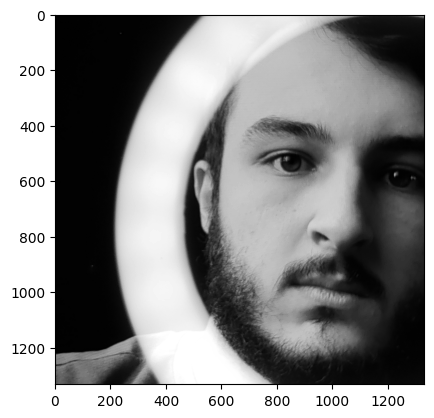

In [5]:
face = get_face(gray)
plt.imshow(face, cmap=cm.gray)

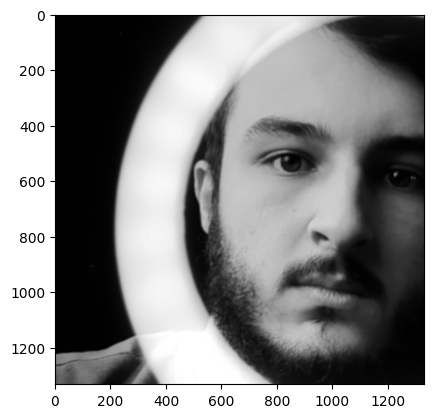

In [6]:
face = cv2.GaussianBlur(face, (11, 11), 0)
plt.imshow(face, cmap=cm.gray)

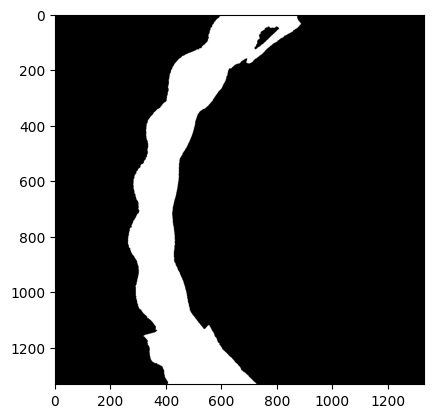

In [7]:
face = cv2.threshold(face, 230, 255, cv2.THRESH_BINARY)[1]
plt.imshow(face, cmap=cm.gray)

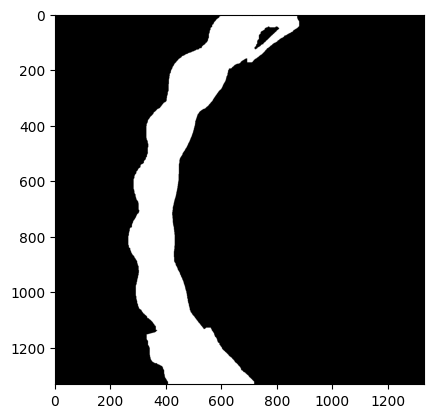

In [8]:
face = cv2.erode(face, None, iterations=8)
face = cv2.dilate(face, None, iterations=8)
plt.imshow(face, cmap=cm.gray)

In [9]:
face.mean()

36.49546505965425